In [1]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from collections import Counter
from PyEMD import EEMD, EMD, Visualisation

In [2]:
# 定义数据分布展示

def show_plot(data,show_num):
    data_list = []
    for a in data[:show_num]:
        data_list.append(a)#append函数会在数组后加上相应的元素
    return data_list

In [12]:
# #EMD处理
# emd = EMD()
# emd.emd(data1)
# imfs, res = emd.get_imfs_and_residue()
# # 绘制 IMF
# vis = Visualisation()
# vis.plot_imfs(imfs=imfs, residue=res, t=range(len(data1)), include_residue=True)

In [13]:
# imfs.shape

# 数据预处理

In [3]:
# 定义样本分割函数
def data_load(path,cut_num,label):
    """
    path：数据地址
    cut_num：每份样本数量
    label:数据标签
    """
    
    data = loadmat(path)
    # 返回list
    list_r = []
    # 原始数据
    org_X = data['data'][:,3]
    org_X = org_X.reshape(len(org_X),1)
    org_Y = data['data'][:,4]
    org_Y = org_Y.reshape(len(org_Y),1)
    org_Z = data['data'][:,5]
    org_Z = org_Z.reshape(len(org_Z),1)

    # 数据归一化
    # 归一化X
    scaler = MinMaxScaler()
#     scaler.fit(list_X)
    list_X_n = scaler.fit_transform(org_X)
    # 归一化Y
    scaler = MinMaxScaler()
#     scaler.fit(list_Y)
    list_Y_n = scaler.fit_transform(org_Y)
    # 归一化Z
    scaler = MinMaxScaler()
#     scaler.fit(list_Y)
    list_Z_n = scaler.fit_transform(org_Z)
    
    # 构建一维数组
    list_X = []
    for x in list_X_n:
        list_X.append(x[0])
        
    list_Y = []
    for y in list_Y_n:
        list_Y.append(y[0])

    list_Z = []
    for z in list_Z_n:
        list_Z.append(z[0])
        
    # 将x，y, z数据放入list
    for x,y,z in zip(list_X,list_Y,list_Z):
        list_r.append([x,y,z])
    
    data_cut = []
    label_cut = []
    
    # 分割数据
    for i in range(0,int(len(list_X_n)/cut_num)):
        data_cut.append(list_r[i * cut_num : (i+1) * cut_num])
        label_cut.append(label)
    return data_cut,label_cut

## 正常轴承

In [10]:
data_0,label_0 = data_load('data/5-normal1-2000rpm-50Nm.mat',200,0)

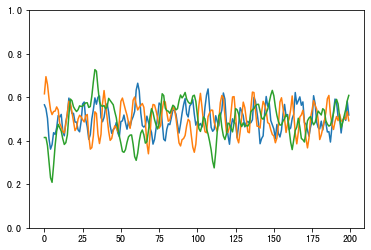

In [11]:
# 设置Y轴范围
plt.ylim(0,1)
show_x = data_0[0]
x = range(len(show_x))
plt.plot(x,show_x)

In [19]:
data_normal = data_0
label_normal = label_0
print("处理后正常样本shape：",np.asarray(data_normal,dtype = 'float').shape)
print("label数：",len(label_normal))

处理后正常样本shape： (960, 1000, 3)
label数： 960


## 输入轴减速器端轴承内滚道故障 2000rpm

In [20]:
data_1,label_1 = data_load('data/1-bearingfault_JSQ1-2000rpm-50Nm.mat',1000,1)

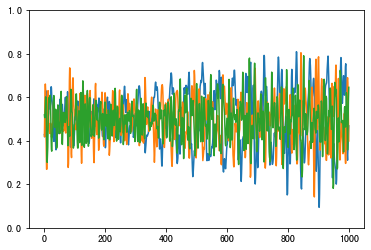

In [21]:
# 设置Y轴范围
plt.ylim(0,1)
show_x = data_1[0]
x = range(len(show_x))
plt.plot(x,show_x)

In [22]:
data_1_2000 = data_1
label_1_2000 = label_1
print("处理后内圈样本shape：",np.asarray(data_1_2000,dtype = 'float').shape)
print("label数：",len(label_1_2000))

处理后内圈样本shape： (960, 1000, 3)
label数： 960


## 输入轴减速器端轴承内滚道故障 5000rpm

In [23]:
data_2,label_2 = data_load('data/1-bearingfault_JSQ1-5000rpm-50Nm.mat',1000,2)

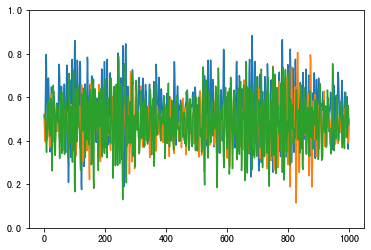

In [24]:
# 设置Y轴范围
plt.ylim(0,1)
show_x = data_2[0]
x = range(len(show_x))
plt.plot(x,show_x)

In [25]:
data_1_5000 = data_2
label_1_5000 = label_2
print("处理后内圈样本shape：",np.asarray(data_1_5000,dtype = 'float').shape)
print("label数：",len(label_1_5000))

处理后内圈样本shape： (960, 1000, 3)
label数： 960


## 输入轴电机端轴承内滚道故障 2000rpm

In [26]:
data_3,label_3 = data_load('data/2-bearingfault_DJ1-2000rpm-50Nm.mat',1000,3)

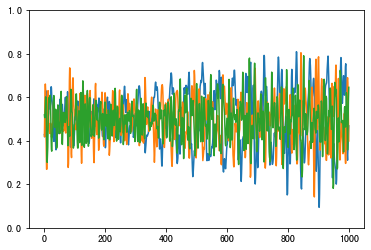

In [27]:
# 设置Y轴范围
plt.ylim(0,1)
show_x = data_1[0]
x = range(len(show_x))
plt.plot(x,show_x)

In [28]:
data_2_2000 = data_3
label_2_2000 = label_3
print("处理后内圈样本shape：",np.asarray(data_2_2000,dtype = 'float').shape)
print("label数：",len(label_2_2000))

处理后内圈样本shape： (960, 1000, 3)
label数： 960


## 输入轴电机端轴承内滚道故障 5000rpm

In [29]:
data_4,label_4 = data_load('data/2-bearingfault_DJ1-5000rpm-50Nm.mat',1000,4)

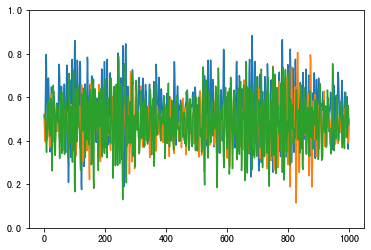

In [30]:
# 设置Y轴范围
plt.ylim(0,1)
show_x = data_2[0]
x = range(len(show_x))
plt.plot(x,show_x)

In [31]:
data_2_5000 = data_4
label_2_5000 = label_4
print("处理后内圈样本shape：",np.asarray(data_2_5000,dtype = 'float').shape)
print("label数：",len(label_2_5000))

处理后内圈样本shape： (960, 1000, 3)
label数： 960


## 中间轴减速器端轴承滚子故障1 2000rpm

In [32]:
data_5,label_5 = data_load('data/3-bearingfault_JSQ1-2000rpm-50Nm.mat',1000,5)

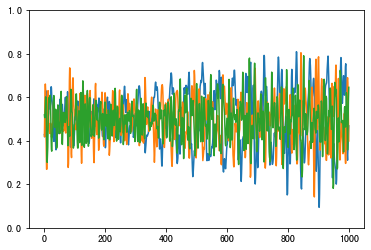

In [33]:
# 设置Y轴范围
plt.ylim(0,1)
show_x = data_1[0]
x = range(len(show_x))
plt.plot(x,show_x)

In [34]:
data_3_1 = data_5
label_3_1 = label_5
print("处理后内圈样本shape：",np.asarray(data_3_1,dtype = 'float').shape)
print("label数：",len(label_3_1))

处理后内圈样本shape： (960, 1000, 3)
label数： 960


## 中间轴减速器端轴承滚子故障2 2000rpm

In [35]:
data_6,label_6 = data_load('data/3-bearingfault_JSQ2-2000rpm-50Nm.mat',1000,6)

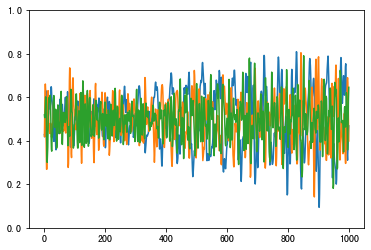

In [36]:
# 设置Y轴范围
plt.ylim(0,1)
show_x = data_1[0]
x = range(len(show_x))
plt.plot(x,show_x)

In [37]:
data_3_2 = data_6
label_3_2 = label_6
print("处理后内圈样本shape：",np.asarray(data_3_2,dtype = 'float').shape)
print("label数：",len(label_3_2))

处理后内圈样本shape： (960, 1000, 3)
label数： 960


## 保存处理后的数据

In [38]:
data_train = np.asarray(data_normal[:900] + data_1_2000[:900] + data_1_5000[:900] + data_2_2000[:900] + data_2_5000[:900] + data_3_1[:900] + data_3_2[:900],dtype = 'float64')
label = np.asarray(label_normal[:900] + label_1_2000[:900] + label_1_5000[:900] + label_2_2000[:900] + label_2_5000[:900] + label_3_1[:900] + label_3_2[:900],dtype = 'int64')

print("处理后样本shape：",data_train.shape)
print("处理后数据类别分布：",Counter(label))

# 保存数据
np.save("train_data/train_data.npy",data_train)
np.save("train_data/label.npy",label)
print("数据保存成功，位置：/train_data/")

处理后样本shape： (6300, 1000, 3)
处理后数据类别分布： Counter({0: 900, 1: 900, 2: 900, 3: 900, 4: 900, 5: 900, 6: 900})
数据保存成功，位置：/train_data/


In [39]:
data_0.shape

AttributeError: 'list' object has no attribute 'shape'

In [ ]:
'''
#EEMD处理
eemd = EEMD()
eemd.eemd(data1)
imfs, res = eemd.get_imfs_and_residue()
# 绘制 IMF
vis = Visualisation()
vis.plot_imfs(imfs=imfs, residue=res, t=range(len(data1)), include_residue=True)